### Import and read data

In [14]:
import pandas as pd
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [17]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


### Show the column names

In [20]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

### Show a single column

In [28]:
df["   TG"][:10]

0    21
1    46
2    31
3    37
4    31
5    16
6     5
7   -27
8    -4
9   -17
Name:    TG, dtype: int64

### Show multiple columns

In [27]:
df[["    DATE", "   TG"]][:10]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
5,1860-01-06,16
6,1860-01-07,5
7,1860-01-08,-27
8,1860-01-09,-4
9,1860-01-10,-17


### Simple Stats

In [32]:
df["   TG"].mean()

np.float64(-991.1500649011311)

### Filtering

In [58]:
raw_data = df.loc[df["   TG"] != -9999]

# TG_mean = df.loc[df["   TG"] != -9999].mean()

entire_mean_data = raw_data.mean()
TG_mean = raw_data["   TG"].mean()
TG_max = raw_data["   TG"].max() / 10
TG_min = raw_data["   TG"].min() / 10

print(f"{TG_mean}")
print(f"{TG_mean:.2f}")
print(f"Max: {TG_max} C")
print(f"Min: {TG_min} C")

63.607875261284676
63.61
Max: 26.2 C
Min: -28.8 C


<Axes: >

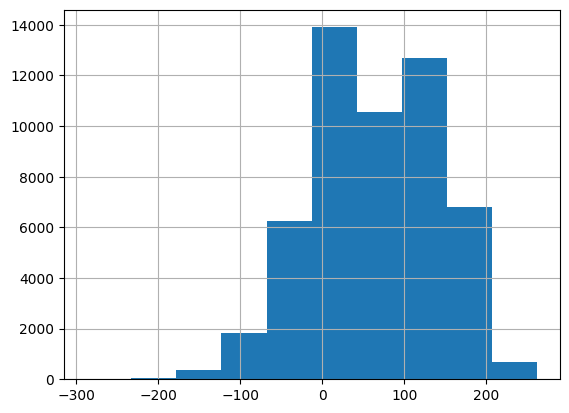

In [59]:
raw_data["   TG"].hist()

### Get certain cells

Search (locate) through the date column to find a value that matches, then only print the value from the TG column

In [5]:
import pandas as pd
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])
temp = df.loc[df["    DATE"] == "18600107"]["   TG"] / 10
print(temp)

6    0.5
Name:    TG, dtype: float64


In [70]:
temp = df.loc[df["    DATE"] == "18600107"]["   TG"].squeeze() / 10
print(temp)

0.5


### Get the date when the temp is the highest

In [82]:
raw_data = df.loc[df["   TG"] != -9999]
TG_max = raw_data["   TG"].max()

date = df.loc[df["   TG"] == TG_max]["    DATE"].squeeze()
print(date)

1868-08-16 00:00:00


### Calculate a new column out of existing column

In [90]:
import numpy as np
# Use .mask() to create a new column that replaces the -9999 value with NaN
df["TG_0"] = df["   TG"].mask(df["   TG"] == -9999, np.nan)

In [94]:
df["new_TG"] = df["TG_0"] / 10

print(df)

       STAID   SOUID       DATE     TG   Q_TG  new_TG  fahrenheit  TG_0
0          1   35381 1860-01-01     21      0     2.1        69.8  21.0
1          1   35381 1860-01-02     46      0     4.6       114.8  46.0
2          1   35381 1860-01-03     31      0     3.1        87.8  31.0
3          1   35381 1860-01-04     37      0     3.7        98.6  37.0
4          1   35381 1860-01-05     31      0     3.1        87.8  31.0
...      ...     ...        ...    ...    ...     ...         ...   ...
59316      1   35381 2022-05-27  -9999      9     NaN         NaN   NaN
59317      1   35381 2022-05-28  -9999      9     NaN         NaN   NaN
59318      1   35381 2022-05-29  -9999      9     NaN         NaN   NaN
59319      1   35381 2022-05-30  -9999      9     NaN         NaN   NaN
59320      1   35381 2022-05-31  -9999      9     NaN         NaN   NaN

[59321 rows x 8 columns]


In [95]:
# Convert to fahrenheit
df["fahrenheit"] = df["TG_0"] * (9/5) + 32
print(df)

       STAID   SOUID       DATE     TG   Q_TG  new_TG  fahrenheit  TG_0
0          1   35381 1860-01-01     21      0     2.1        69.8  21.0
1          1   35381 1860-01-02     46      0     4.6       114.8  46.0
2          1   35381 1860-01-03     31      0     3.1        87.8  31.0
3          1   35381 1860-01-04     37      0     3.7        98.6  37.0
4          1   35381 1860-01-05     31      0     3.1        87.8  31.0
...      ...     ...        ...    ...    ...     ...         ...   ...
59316      1   35381 2022-05-27  -9999      9     NaN         NaN   NaN
59317      1   35381 2022-05-28  -9999      9     NaN         NaN   NaN
59318      1   35381 2022-05-29  -9999      9     NaN         NaN   NaN
59319      1   35381 2022-05-30  -9999      9     NaN         NaN   NaN
59320      1   35381 2022-05-31  -9999      9     NaN         NaN   NaN

[59321 rows x 8 columns]


### Plotting

<Axes: >

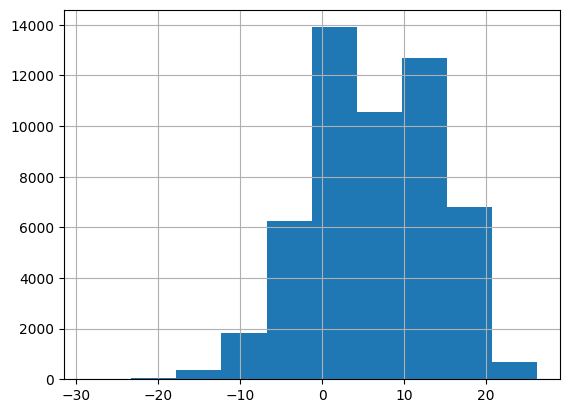

In [96]:
df["new_TG"].hist()

<Axes: xlabel='    DATE'>

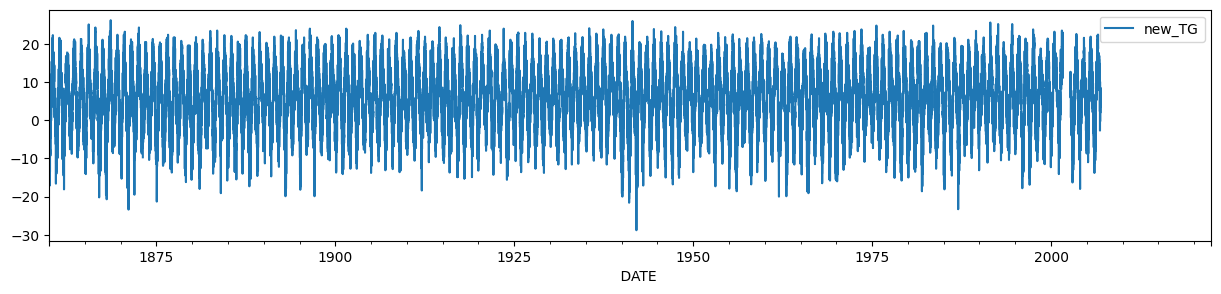

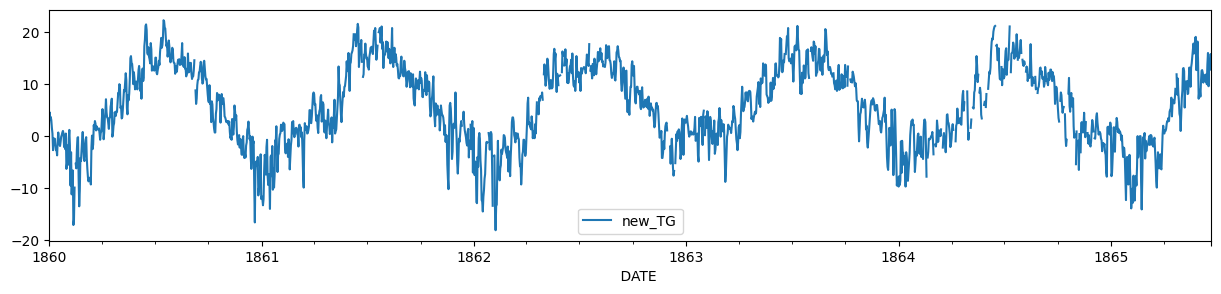

In [110]:
df.plot(x="    DATE", y="new_TG", figsize=(15, 3))
df[:2000].plot(x="    DATE", y="new_TG", figsize=(15, 3))